# Práctica 2 FAA
___
#### Grupo 1461, pareja 16
#### Alfonso Carvajal y Lucía Asencio
___

## Apartado 1: KNN
___

# FONS
Pa esto mira más o menos lo que yo he escrito en el apartado 2, la idea sería que hicieses un análisis parecido. Aquí es donde dijo el profe que si ek k maximo que te pedían probar tardaba mucho con online shoppers, que pasaras. 
También es medio importante que no copypastees bloques de código: el profe dijo que penalizaba más por eso que por cosas del tipo 'no he hecho el analisis ROC'

In [1]:
import Datos as d
import Clasificador as cl
import EstrategiaParticionado as ep
import numpy as np

num_vecinos = [1,3,5,11,21,51]
weights = [True, False]
ks = [4,8,12]
porcentajes = [20]
nRepeticionesSimple = 15
nRepeticionesCruzada = 5
dicc = {'Online shoppers':'./datos/online_shoppers.data', 'wdbc' : './datos/wdbc.data'}

def miKNN_prueba(dicc, num_vecinos, weights, ks, porcentajes, nRepeticionesSimple, nRepeticionesCruzada):
    cont = 0
    file = -1
    total = len(num_vecinos) * len(weights) * (len(ks) + len(porcentajes))
    for fileName in dicc:
        file += 1
        dataset = d.Datos(dicc[fileName], oneHot = True)
        for w in weights:
            for vec in num_vecinos:
                clf = cl.ClasificadorVecinosProximos(vec,w)
                for prcnt in porcentajes:
                    errors = []
                    for i in range(nRepeticionesSimple):
                        estrategia = ep.ValidacionSimple(prcnt)
                        errors.append(clf.validacion(estrategia,dataset,clf))
                    errorsnp = np.array(errors)
                    mean,std = np.mean(errors), np.std(errors)
                    cont +=1
                    print("\nFile ", file, " Iteracion ", cont, "/", total)
                    print('VSimple ',prcnt,'%, Vecinos =', vec, ', usar distancia inversa:', w)
                    print('Error medio: ', mean, '\nDesviacion tipica: ', std)

                for k in ks:
                    errors = []
                    for i in range(nRepeticionesCruzada):
                        estrategia = ep.ValidacionCruzada(k)
                        errors.append(clf.validacion(estrategia,dataset,clf))
                    errorsnp = np.array(errors)
                    mean,std = np.mean(errors), np.std(errors)
                    cont +=1
                    print("\nFile ", file, " Iteracion ", cont, "/", total)
                    print('VCruzada con K =',k,', Vecinos =', vec, ', usar distancia inversa:', w)
                    print('Error medio: ', mean, '\nDesviacion tipica: ', std)
                    

In [ ]:
miKNN_prueba(dicc, num_vecinos, weights, ks, porcentajes, nRepeticionesSimple, nRepeticionesCruzada)

## Apartado 2: Regresión Logística
___

En este apartado estudiamos los resultados de ejecutar nuestra implementación del algoritmo de regresión logística para distintos parámetros. Esta implementación puede encontrarse en la clase `ClasificadorRegresionLogistica` dentro de `Clasificador.py`

Vamos a variar, en los conjuntos de datos `online_shoppers.data` y `wdbc.data`, la estrategia de particionado y sus parámetros, la constante de aprendizaje y el número de épocas.

Para este apartado implementamos en la clase Datos la codificación one hot, que (como puede verse a continuación) se indica como argumento opcional en el constructor del objeto de datos.

In [2]:
import Clasificador as cl
import EstrategiaParticionado as ep
import Datos as d
import numpy as np

epocas = [1,4,8,14]
ctesApr = [0.2, 0.5, 1]
ks = [4,8,12]
porcentajes = [20,30]
nRepeticionesSimple = 15
nRepeticionesCruzada = 5

dicc = {'Online shoppers':'./datos/online_shoppers.data', 'wdbc' : './datos/wdbc.data'}

def miRegLog_prueba(dicc, epocas, ctesApr, ks, porcentajes, nRepeticionesSimple, nrRepeticionesCruzada):
    for fileName in dicc:     
        dataset = d.Datos(dicc[fileName], oneHot = True)
        for cteApr in ctesApr:
            for nEpocas in epocas:
                clf = cl.ClasificadorRegresionLogistica(cteApr, nEpocas)            
                for porcentaje in porcentajes:
                    errors = []
                    for i in range(nRepeticionesSimple):
                        estrategia = ep.ValidacionSimple(porcentaje)
                        errors.append(clf.validacion(estrategia,dataset,clf))
                    errorsnp = np.array(errors)
                    mean,std = np.mean(errors), np.std(errors)
                    print('\nVSimple ',porcentaje,'%, CteApr', cteApr, ', ', nEpocas, 'epocas')
                    print('Error medio: ', mean, '\nDesviacion tipica: ', std)
                for k in ks:
                    errors = []
                    for i in range(nRepeticionesCruzada):
                        estrategia = ep.ValidacionCruzada(k)
                        errors.append(clf.validacion(estrategia,dataset,clf))
                    errorsnp = np.array(errors)
                    mean,std = np.mean(errors), np.std(errors)
                    print('\nVCruzada k =', k,', CteApr', cteApr, ', ', nEpocas, 'epocas')
                    print('Error medio: ', mean, '\nDesviacion tipica: ', std)


    


In [1]:
miRegLog_prueba(dicc, epocas, ctesApr, ks, porcentajes, nRepeticionesSimple, nRepeticionesCruzada)


VSimple  20 %, CteApr 0.2 ,  1 epocas
Error medio:  0.2524736415247364 
Desviacion tipica:  0.250083037304941

VSimple  30 %, CteApr 0.2 ,  1 epocas
Error medio:  0.3333874020005407 
Desviacion tipica:  0.27789052862841057

VCruzada k = 4 , CteApr 0.2 ,  1 epocas
Error medio:  0.2694516547696301 
Desviacion tipica:  0.10909053234507836

VCruzada k = 8 , CteApr 0.2 ,  1 epocas
Error medio:  0.1856748864373783 
Desviacion tipica:  0.05965282504835199

VCruzada k = 12 , CteApr 0.2 ,  1 epocas
Error medio:  0.23818565400843883 
Desviacion tipica:  0.061710396632673636

VSimple  20 %, CteApr 0.2 ,  4 epocas
Error medio:  0.20537983238713167 
Desviacion tipica:  0.21595592895286925

VSimple  30 %, CteApr 0.2 ,  4 epocas
Error medio:  0.21528340993061187 
Desviacion tipica:  0.21799935613655858

VCruzada k = 4 , CteApr 0.2 ,  4 epocas
Error medio:  0.27925048669695 
Desviacion tipica:  0.09059280626962493

VCruzada k = 8 , CteApr 0.2 ,  4 epocas
Error medio:  0.27027903958468524 
Desviacion 


VCruzada k = 4 , CteApr 0.2 ,  8 epocas
Error medio:  0.39295774647887327 
Desviacion tipica:  0.012468965640581538

VCruzada k = 8 , CteApr 0.2 ,  8 epocas
Error medio:  0.34542253521126753 
Desviacion tipica:  0.04953913771396678

VCruzada k = 12 , CteApr 0.2 ,  8 epocas
Error medio:  0.376241134751773 
Desviacion tipica:  0.01547335051721373

VSimple  20 %, CteApr 0.2 ,  14 epocas
Error medio:  0.1657817109144543 
Desviacion tipica:  0.10087287960982169

VSimple  30 %, CteApr 0.2 ,  14 epocas
Error medio:  0.14862745098039215 
Desviacion tipica:  0.08854759546606555

VCruzada k = 4 , CteApr 0.2 ,  14 epocas
Error medio:  0.2700704225352113 
Desviacion tipica:  0.06170115343212148

VCruzada k = 8 , CteApr 0.2 ,  14 epocas
Error medio:  0.2605633802816901 
Desviacion tipica:  0.02618449639799748

VCruzada k = 12 , CteApr 0.2 ,  14 epocas
Error medio:  0.2797872340425532 
Desviacion tipica:  0.030779651595925852

VSimple  20 %, CteApr 0.5 ,  1 epocas
Error medio:  0.25250737463126843 

Debido a la gran cantidad de variables que intervienen, es muy difícil realizar un análisis bidimensional de los resultados. 
Si representamos todos los datos obtenidos, necesitaríamos rellenar $5 \times 12 \times 2 = 120 $ pares (media, desviación típica) lo que haría innecesariamente complejo el análisis, así que hemos optado por representar las pruebas con validación simple y parámetro 30%, y con validación cruzada y parámetro $K = 8$

Además, crearemos una tabla para cada uno de los ficheros.

Ejecutamos una vez más, con un número alto de épocas, para asegurar que el error está llegando a su mínimo y adjuntamos al final de la tabla del correspondiente fichero

In [3]:
epocas = [50]
ctesApr = [0.2, 0.5, 1]
ks = [8]
porcentajes = [30]
nRepeticionesSimple = 15
nRepeticionesCruzada = 5

dicc = {'Online shoppers':'./datos/online_shoppers.data', 'wdbc' : './datos/wdbc.data'}
miRegLog_prueba(dicc, epocas, ctesApr, ks, porcentajes, nRepeticionesSimple, nRepeticionesCruzada)


VSimple  30 %, CteApr 0.2 ,  50 epocas
Error medio:  0.13021537352437595 
Desviacion tipica:  0.019903259935160008

VCruzada k = 8 , CteApr 0.2 ,  50 epocas
Error medio:  0.14122323166774822 
Desviacion tipica:  0.023046469610528628

VSimple  30 %, CteApr 0.5 ,  50 epocas
Error medio:  0.20946201676128684 
Desviacion tipica:  0.18578438324987823

VCruzada k = 8 , CteApr 0.5 ,  50 epocas
Error medio:  0.16288124594419207 
Desviacion tipica:  0.041914375998584726

VSimple  30 %, CteApr 1 ,  50 epocas
Error medio:  0.1600432549337659 
Desviacion tipica:  0.14843597167234823

VCruzada k = 8 , CteApr 1 ,  50 epocas
Error medio:  0.15165476963011032 
Desviacion tipica:  0.014751958597814216

VSimple  30 %, CteApr 0.2 ,  50 epocas
Error medio:  0.14156862745098042 
Desviacion tipica:  0.05840899690011254

VCruzada k = 8 , CteApr 0.2 ,  50 epocas
Error medio:  0.2390845070422535 
Desviacion tipica:  0.015364383260050287

VSimple  30 %, CteApr 0.5 ,  50 epocas
Error medio:  0.1572549019607843 

![online shoppers](https://github.com/luciaasen/FAA/blob/master/p2/tablas/img_reglog_onlineshoppers_nuestra.png?raw=true "RegLog on online shoppers")

<table style="border-collapse:collapse;border-spacing:0;border-color:#bbb" class="tg"><tr><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#9de0ad;text-align:center;vertical-align:middle">50 épocas</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#e0ffeb;text-align:center;vertical-align:middle">(0.13, 0.01)</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#e0ffeb;text-align:center;vertical-align:middle">(0.14, 0.2)</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#e0ffeb;text-align:center;vertical-align:middle">(0.2, 0.18)</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#e0ffeb;text-align:center;vertical-align:middle">(0.16, 0.04)</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#e0ffeb;text-align:center;vertical-align:middle">(0.16, 0.1)</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#e0ffeb;text-align:center;vertical-align:middle">(0.15, 0.01)</th></tr></table>

<table style="border-collapse:collapse;border-spacing:0;border-color:#bbb" class="tg"><tr><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#b6ddc0;text-align:center;vertical-align:middle" rowspan="2"><span style="font-weight:bold">wdbc</span><br>(Error medio, <br>desviación típica<br> media)<br></th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#9DE0AD;text-align:center;vertical-align:middle" colspan="2">μ = 0.2</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#9DE0AD;text-align:center;vertical-align:middle" colspan="2">μ = 0.5</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#9DE0AD;text-align:center;vertical-align:middle" colspan="2">μ =1</th></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle">VSimple<br>30%</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle">VCruzada<br>K = 8</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle">VSimple<br>30%</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle">VCruzada<br>K = 8</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle">VSimple<br>30%</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle">VCruzada<br>K = 8</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle" rowspan="3">1 época</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.28, 0.21)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0,29, 0.05)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.31, 0.21)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.29, 0.05)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.34, 0.22)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.34, 0.07)</td></tr><tr></tr><tr></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle" rowspan="3">4 épocas</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.19, 0.15)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.32, 0.02)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.21, 0.15)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.3, 0.03)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.17, 0.13)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.32, 0.02)</td></tr><tr></tr><tr></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle" rowspan="3">8 épocas</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.26, 0.17)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.34, 0.04)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.2, 0.15)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.36, 0.01)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.12, 0.08)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.36, 0.03)</td></tr><tr></tr><tr></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle" rowspan="3">14 épocas</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.14, 0.08)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.26, 0.02)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.14, 0.08)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.28, 0.01)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.11, 0.94)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.27, 0.03)</td></tr><tr></tr><tr></tr></table>

<table style="border-collapse:collapse;border-spacing:0;border-color:#bbb" class="tg"><tr><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#9de0ad;text-align:center;vertical-align:middle">50 épocas</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#e0ffeb;text-align:center;vertical-align:middle">(0.14, 0.05)</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#e0ffeb;text-align:center;vertical-align:middle">(0.2, 0.01)</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#e0ffeb;text-align:center;vertical-align:middle">(0.25, 0.02)</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#e0ffeb;text-align:center;vertical-align:middle">(0.14, 0.09)</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#e0ffeb;text-align:center;vertical-align:middle">(0.14, 0.09)</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#e0ffeb;text-align:center;vertical-align:middle">(0.15, 0.03)</th></tr></table>

#### Análisis resultados

* Como era de esperar, en ambos ficheros el error decrece según aumenta el número de épocas, y en el caso de `online_shoppers`, la convergencia del error es más lenta, ya que no basta con 14 épocas para alcanzarla, al contrario que en el caso de `wdbc`.
* No queda claro qué $\mu$ da la constante de aprendizaje óptima, pero parece que, aunque la diferencia no sea grande, los $\mu$ que producen cambios menos bruscos (\$\mu = 0.2, 0.5$) producen un error menor durante las primeras épocas. En el fichero de `online_shopers`parece que, aunque el error inicial sea mejor, el usar valores altos de $\mu$ podría tener como consecuencia una convergencia más temprana. Sería necesario realizar un estudio con más repeticiones y más valores para la constante de aprendizaje para comprobar estas afirmaciones.
* En el fichero de `online_shoppers`, los errores, independientemente del número de épocas o de la constante de aprendizaje, son menores cuando usamos validación cruzada para particionar los datos, tal y coomo podíamos esperar a partir de los estudios de la práctica anterior. Sin embargo, en el fichero `wdbc` ocurre justo lo contrario. No sabemos qué diferencia podría haber entre ambos ficheros para que los aciertos de regresión logística dependieran de la validación, así que podría ser un suceso fortuita.
* En ningún caso el error parece converger a un valor muy bajo, y esto puede ser porque  los datos no estén separados realmente con una frontera lineal.

# FONS
Aqui añade algo que compare el algoritmo mio con tus resultados de KNN

## Apartado 3: Scikit, fronteras
___

###  Scikit Regresión logística
___

Hemos optado por usar la clase SGD de scikit para compararla con nuestra implementación de regresión logística.

En `scikit.py` puede encontrarse la implementación a la función a la que llamaremos a continuación que, dadas las épocas que quieren probarse, las constantes de aprendizaje, el número de repeticiones para cada particionado y los parámetros de los mismos, ejecutan el entrenamiento y clasificación SGD que analizaremos.

Al principio de este fichero, puede observarse que hemos activado un filtro que ignora los warnings. Esto es porque SGD lanzaba  `ConvergenceWarning` cada vez que no seleccionábamos un número de épocas suficientes para que el algoritmo convergiese. Como nuestro objetivo era precisamente estudiar esta convergencia según el número de épocas y no escoger desde un principio el valor óptimo, decidimos desactivarlos


In [1]:
import scikit
epocas = [1,4,8,14]
ctesApr = [0.2, 0.5, 1]
ks = [4,8,12]
porcentajes = [20,30]
nRepeticionesSimple = 15
nRepeticionesCruzada = 8


fileName = './datos/online_shoppers.data'
scikit.logReg(fileName, epocas, ctesApr, nRepeticionesSimple, nRepeticionesCruzada, porcentajes, ks )
fileName = './datos/wdbc.data'
scikit.logReg(fileName, epocas, ctesApr, nRepeticionesSimple, nRepeticionesCruzada, porcentajes, ks )


 ./datos/online_shoppers.data 
SGD

VSimple, 20 %, CteApr  0.2 Epocas  1 
Error medio: 0.24375000000000002 
Desviacion tipica: 0.20832291640623699

VSimple, 20 %, CteApr  0.2 Epocas  4 
Error medio: 0.22499999999999998 
Desviacion tipica: 0.20766559657295186

VSimple, 20 %, CteApr  0.2 Epocas  8 
Error medio: 0.11875000000000001 
Desviacion tipica: 0.07043392293490401

VSimple, 20 %, CteApr  0.2 Epocas  14 
Error medio: 0.15625000000000003 
Desviacion tipica: 0.17399263633843817

VSimple, 20 %, CteApr  0.5 Epocas  1 
Error medio: 0.13749999999999998 
Desviacion tipica: 0.0739509972887452

VSimple, 20 %, CteApr  0.5 Epocas  4 
Error medio: 0.1625 
Desviacion tipica: 0.07806247497997998

VSimple, 20 %, CteApr  0.5 Epocas  8 
Error medio: 0.19375 
Desviacion tipica: 0.17399263633843817

VSimple, 20 %, CteApr  0.5 Epocas  14 
Error medio: 0.16249999999999998 
Desviacion tipica: 0.0649519052838329

VSimple, 20 %, CteApr  1 Epocas  1 
Error medio: 0.15 
Desviacion tipica: 0.1561249499599599


VSimple, 30 %, CteApr  1 Epocas  8 
Error medio: 0.033333333333333326 
Desviacion tipica: 0.028867513459481284

VSimple, 30 %, CteApr  1 Epocas  14 
Error medio: 0.07499999999999998 
Desviacion tipica: 0.04330127018922192

VCruzada K =, 4 CteApr  0.2 Epocas  1 
Error medio: 0.07101431432417347 
Desviacion tipica: 0.012907091681834145

VCruzada K =, 4 CteApr  0.2 Epocas  4 
Error medio: 0.05657687383039498 
Desviacion tipica: 0.009524505161365042

VCruzada K =, 4 CteApr  0.2 Epocas  8 
Error medio: 0.05318214649200565 
Desviacion tipica: 0.007955603070067579

VCruzada K =, 4 CteApr  0.2 Epocas  14 
Error medio: 0.054724383597623064 
Desviacion tipica: 0.0056172198879447174

VCruzada K =, 4 CteApr  0.5 Epocas  1 
Error medio: 0.07604238484520173 
Desviacion tipica: 0.01302843006388227

VCruzada K =, 4 CteApr  0.5 Epocas  4 
Error medio: 0.06256607242522734 
Desviacion tipica: 0.008567475770705765

VCruzada K =, 4 CteApr  0.5 Epocas  8 
Error medio: 0.055894809415936206 
Desviacion tipic

<table style="border-collapse:collapse;border-spacing:0;border-color:#bbb" class="tg"><tr><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#b6ddc0;text-align:center;vertical-align:middle" rowspan="2"><span style="font-weight:bold">wdbc</span><br>(Error medio, <br>desviación típica<br> media)<br></th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#9DE0AD;text-align:center;vertical-align:middle" colspan="2">μ = 0.2</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#9DE0AD;text-align:center;vertical-align:middle" colspan="2">μ = 0.5</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#9DE0AD;text-align:center;vertical-align:middle" colspan="2">μ =1</th></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle">VSimple<br>30%</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle">VCruzada<br>K = 8</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle">VSimple<br>30%</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle">VCruzada<br>K = 8</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle">VSimple<br>30%</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle">VCruzada<br>K = 8</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle" rowspan="3">1 época</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.06, 0.04)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0,06, 0.004)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.04, 0.03)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.06, 0.01)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.05, 0.03)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.06, 0.01)</td></tr><tr></tr><tr></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle" rowspan="3">4 épocas</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.03, 0.04)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.05, 0.007)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.04, 0.04)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.05, 0.006)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.04, 0.02)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.05, 0.004)</td></tr><tr></tr><tr></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle" rowspan="3">8 épocas</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.05, 0.3)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.05, 0.006)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.03, 0.04)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.05, 0.007)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.03, 0.02)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.05, 0.007)</td></tr><tr></tr><tr></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle" rowspan="3">14 épocas</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.07, 0.03)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.05, 0.006)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.04, 0.03)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.05, 0.005)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.07, 0.04)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.05, 0.006)</td></tr><tr></tr><tr></tr></table>

Parece que a las 14 épocas, la regresión logística ya ha convergido para el dataset wdbc, por lo cual no ejecutamos con más épocas

Sin embargo, los errores en online shoppers a las 14 épocas todavía son altos. Probamos con un número de épocas alto en el que suponemos el error ya habrá convergido a un valor más bajo:

In [16]:
import scikit
epocas = [100]
ctesApr = [0.2, 0.5, 1]
ks = [8]
porcentajes = [30]
nRepeticionesSimple = 15
nRepeticionesCruzada = 8
fileName = './datos/online_shoppers.data'
scikit.logReg(fileName, epocas, ctesApr, nRepeticionesSimple, nRepeticionesCruzada, porcentajes, ks )



 ./datos/online_shoppers.data 
SGD

VSimple, 30 %, CteApr  0.2 Epocas  100 
Error medio: 0.13749999999999998 
Desviacion tipica: 0.08239049972202163

VSimple, 30 %, CteApr  0.5 Epocas  100 
Error medio: 0.13749999999999998 
Desviacion tipica: 0.06332785063987778

VSimple, 30 %, CteApr  1 Epocas  100 
Error medio: 0.1958333333333333 
Desviacion tipica: 0.2091235015221601

VCruzada K =, 8 CteApr  0.2 Epocas  100 
Error medio: 0.18467141678400978 
Desviacion tipica: 0.03198746935655772

VCruzada K =, 8 CteApr  0.5 Epocas  100 
Error medio: 0.21614106692612617 
Desviacion tipica: 0.0667170856365659

VCruzada K =, 8 CteApr  1 Epocas  100 
Error medio: 0.1868115717583065 
Desviacion tipica: 0.03824203225928015


<table style="border-collapse:collapse;border-spacing:0;border-color:#bbb" class="tg"><tr><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#b6ddc0;text-align:center;vertical-align:middle" rowspan="2"><span style="font-weight:bold">Online shoppers</span><br>(Error medio, <br>desviación típica<br> media)<br></th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#9DE0AD;text-align:center;vertical-align:middle" colspan="2">μ = 0.2</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#9DE0AD;text-align:center;vertical-align:middle" colspan="2">μ = 0.5</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#9DE0AD;text-align:center;vertical-align:middle" colspan="2">μ =1</th></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle">VSimple<br>30%</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle">VCruzada<br>K = 8</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle">VSimple<br>30%</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle">VCruzada<br>K = 8</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle">VSimple<br>30%</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle">VCruzada<br>K = 8</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle" rowspan="3">1 época</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.14, 0.09)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0,19, 0.06)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.12, 0.03)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.21, 0.05)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.18, 0.04)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.18, 0.04)</td></tr><tr></tr><tr></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle" rowspan="3">4 épocas</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.24, 0.22)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.17, 0.04)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.16, 0.09)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.23, 0.05)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.14, 0.09)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.18, 0.04)</td></tr><tr></tr><tr></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle" rowspan="3">8 épocas</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.15, 0.1)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.17, 0.03)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.14, 0.02)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.19, 0.05)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.32, 0.26)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.22, 0.07)</td></tr><tr></tr><tr></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle" rowspan="3">14 épocas</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.22, 0.08)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.18, 0.04)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.22, 0.12)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.19, 0.06)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.15, 0.13)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.2, 0.05)</td></tr><tr></tr><tr></tr></table>

<table style="border-collapse:collapse;border-spacing:0;border-color:#bbb" class="tg"><tr><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#9de0ad;text-align:center;vertical-align:middle">50 épocas</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#e0ffeb;text-align:center;vertical-align:middle">(0.13, 0.08)</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#e0ffeb;text-align:center;vertical-align:middle">(0.13, 0.06)</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#e0ffeb;text-align:center;vertical-align:middle">(0.19, 0.02)</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#e0ffeb;text-align:center;vertical-align:middle">(0.18, 0.03)</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#e0ffeb;text-align:center;vertical-align:middle">(0.21, 0.06)</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#e0ffeb;text-align:center;vertical-align:middle">(0.15, 0.03)</th></tr></table>

#### Análisis resultados y comparación con nuestra implementación

* Al igual que antes, el error de regresión logística converge antes en `wdbc`  que en `online_shoppers`, lo cual podría estar relacionado con el hecho de que el dataset en el primer caso es mucho más pequeño que en el segundo.
* El error en `wdbc` es, de hecho, muy bajo desde el principio, más de lo que era en nuestra implementación. Podríamos pensar que esto se debe a que nuestra implementación necesita un número mayor de épocas para converger pero, por lo que hemos probado, nuestro error no sufría grandes cambios a partir de las 50 épocas. Como `wdbc` funciona extraordinariamente bien con SGD, independientemente de la estrategia de particionado, la constante de aprendizaje y el número de épocas, no merece la pena hacer muchas más comparaciones sobre este fichero.
* Con las constantes de aprendizaje ocurre algo parecido a lo que vimos en nuestra implementación. Las $\nu$ que producen un cambio moderado, ni muy brusco ni muy suave, dan errores medios más bajos, pero de nuevo la convergencia parece ser más temprana para $\mu = 1$. Parece que estas características son propias del algoritmo y no de nuestra implementación.
* Con la implementación de scikit tamopco parece ser determinante la estrategia de particionado, los resultados varían sin depender del número de épocas o de $\mu$

### Scikit KNN
___

In [1]:
import scikit
nVecinos = [1, 3, 5, 11, 21, 51]
ks = [8]
porcentajes = [30]
nRepeticionesSimple = 15
nRepeticionesCruzada = 8
fileName = './datos/wdbc.data'
scikit.knn(fileName, nVecinos, 'uniform', nRepeticionesSimple, nRepeticionesCruzada, porcentajes, ks )



 KNN de scikit en fichero  ./datos/wdbc.data

VSimple, 30 %,  1 vecinos
Error medio: 0.09999999999999999 
Desviacion tipica: 0.036514837167011066

VSimple, 30 %,  3 vecinos
Error medio: 0.0711111111111111 
Desviacion tipica: 0.052868343348312516

VSimple, 30 %,  5 vecinos
Error medio: 0.03777777777777777 
Desviacion tipica: 0.03624334762288909

VSimple, 30 %,  11 vecinos
Error medio: 0.07555555555555556 
Desviacion tipica: 0.05370242654930919

VSimple, 30 %,  21 vecinos
Error medio: 0.06888888888888887 
Desviacion tipica: 0.07248669524577818

VSimple, 30 %,  51 vecinos
Error medio: 0.06222222222222221 
Desviacion tipica: 0.05691665988829197

VCruzada K =, 8 1 vecinos
Error medio: 0.08523449726134585 
Desviacion tipica: 0.0071101647790597616

VCruzada K =, 8 3 vecinos
Error medio: 0.06830435739436623 
Desviacion tipica: 0.006243569091801339

VCruzada K =, 8 5 vecinos
Error medio: 0.050958528951486726 
Desviacion tipica: 0.0032758968840121377

VCruzada K =, 8 11 vecinos
Error medio: 0.0

In [2]:
fileName = './datos/online_shoppers.data'
scikit.knn(fileName, nVecinos, 'uniform', nRepeticionesSimple, nRepeticionesCruzada, porcentajes, ks )



 KNN de scikit en fichero  ./datos/online_shoppers.data

VSimple, 30 %,  1 vecinos
Error medio: 0.1711111111111111 
Desviacion tipica: 0.08595146491472765

VSimple, 30 %,  3 vecinos
Error medio: 0.1644444444444444 
Desviacion tipica: 0.05086899174337598

VSimple, 30 %,  5 vecinos
Error medio: 0.15777777777777774 
Desviacion tipica: 0.0660714166547489

VSimple, 30 %,  11 vecinos
Error medio: 0.13777777777777775 
Desviacion tipica: 0.07390350732584841

VSimple, 30 %,  21 vecinos
Error medio: 0.16444444444444442 
Desviacion tipica: 0.06261779023824611

VSimple, 30 %,  51 vecinos
Error medio: 0.13999999999999999 
Desviacion tipica: 0.06798692684790379

VCruzada K =, 8 1 vecinos
Error medio: 0.1962173370690954 
Desviacion tipica: 0.005933480119555266

VCruzada K =, 8 3 vecinos
Error medio: 0.15784610639283703 
Desviacion tipica: 0.0026628325770780164

VCruzada K =, 8 5 vecinos
Error medio: 0.1413825247072874 
Desviacion tipica: 0.0023983264364497163

VCruzada K =, 8 11 vecinos
Error medio:

<table style="border-collapse:collapse;border-spacing:0;border-color:#bbb" class="tg"><tr><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#b6ddc0;text-align:center;vertical-align:middle"><span style="font-weight:bold">wdbc</span><br>(Error medio, <br>desciación típica<br>media)</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#9de0ad;text-align:center;vertical-align:middle">VSimple<br>30%</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#9de0ad;text-align:center;vertical-align:middle">VCruzada<br>K = 8</th></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle" rowspan="3">1 vecino</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.09, 0.03)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0,08, 0.007)</td></tr><tr></tr><tr></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle" rowspan="3">3 vecinos</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.07, 0.05)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.06, 0.006)</td></tr><tr></tr><tr></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle" rowspan="3">5 vecinos</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.03, 0.03)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.05, 0.003)</td></tr><tr></tr><tr></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle">11 vecinos</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle">(0.07, 0.05)<br></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle">(0.05, 0.002)</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle">21 vecinos</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle">(0.06, 0.07)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle">(0.06, 0.002)</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle">51 vecinos</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle">(0.06, 0.05)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle">(0.07, 0.002)</td></tr></table>

<table style="border-collapse:collapse;border-spacing:0;border-color:#bbb" class="tg"><tr><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#b6ddc0;text-align:center;vertical-align:middle"><span style="font-weight:bold">online_shoppers</span><br>(Error medio, <br>desciación típica<br>media)</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#9de0ad;text-align:center;vertical-align:middle">VSimple<br>30%</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#493F3F;background-color:#9de0ad;text-align:center;vertical-align:middle">VCruzada<br>K = 8</th></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle" rowspan="3">1 vecino</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.17, 0.08)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.19, 0.005)</td></tr><tr></tr><tr></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle" rowspan="3">3 vecinos</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.16, 0.05)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle" rowspan="3">(0.15, 0.002)</td></tr><tr></tr><tr></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle" rowspan="3">5 vecinos</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.15, 0.06)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle" rowspan="3">(0.14, 0.002)</td></tr><tr></tr><tr></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle">11 vecinos</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle">(0.13, 0.07)<br></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle">(0.13, 0.0008)</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle">21 vecinos</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle">(0.13, 0.06)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#C2FFD6;text-align:center;vertical-align:middle">(0.13, 0.0003)</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#9de0ad;text-align:center;vertical-align:middle">51 vecinos</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle">(0.13, 0.06)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#594F4F;background-color:#E0FFEB;text-align:center;vertical-align:middle">(0.14, 0.0004)</td></tr></table>

# FONS
Analiza los resultados de estas dos tablas, y luego compáralos con tu implementación.

A mi de esto me llama la atención lo brutalmente bajos que son los errores en wdbc, que eso podría ser porque los datos están agrupados con estructura de bola (bolas como las de matematicas) para la distancia euclidea, que es la que usamos aqui.

### Regiones y fronteras de decisión
___

Definimos una función que automatizará el dibujo de las gráficas

In [2]:
import Datos as d
import Clasificador as cl
import EstrategiaParticionado as ep
from plotModel import plotModel
import matplotlib.pyplot as plt

def grafica(fileName, title, clf):
    dataset = d.Datos(fileName, oneHot = True)
    particionado = ep.ValidacionSimple(25)
    listaParticiones = particionado.creaParticiones(dataset.datos, 2)

    indicesTr = listaParticiones[0].indicesTrain
    trainData = dataset.extraeDatos(indicesTr)
    clf.entrenamiento(trainData, dataset.nominalAtributos, dataset.diccionarios)
    plotModel(dataset.datos[indicesTr, 0], dataset.datos[indicesTr, 1], dataset.datos[indicesTr, -1]!= 0, clf, title, dataset.diccionarios)


### Regresión logística

In [6]:
clf = cl.ClasificadorRegresionLogistica()

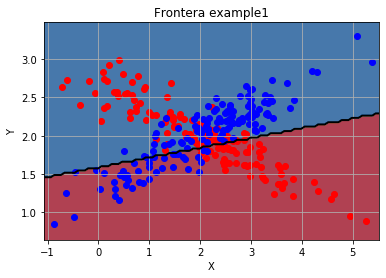

In [12]:
grafica('./datos/example1.data', 'Frontera example1', clf)

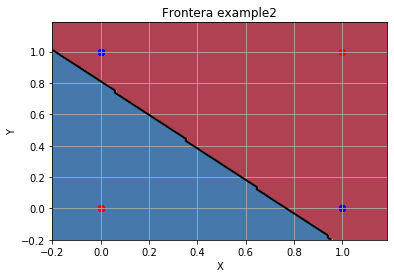

In [13]:
grafica('./datos/example2.data', 'Frontera example2', clf)

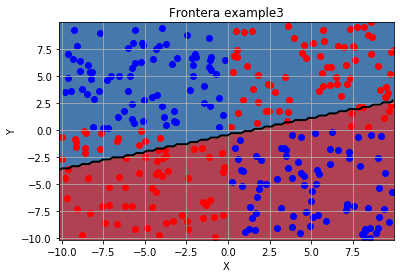

In [14]:
grafica('./datos/example3.data', 'Frontera example3', clf)

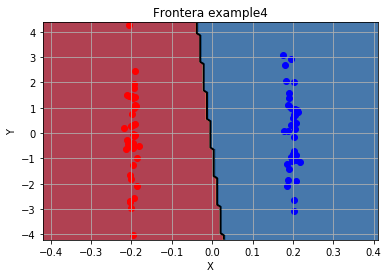

In [15]:
grafica('./datos/example4.data', 'Frontera example4', clf)

Como se observa en las gráficas, el único conjunto que queda bien clasificado por regresión logística es `example4`. En los otros 3 conjuntos, lo mejor que puede hacer el algoritmo es intentar trazar una frontera que acierte con más o menos la mitad de los datos (esto es a lo que se llega cuando tratamos de minimizar el error: por la distribución de los datos, cualquier frontera lineal que tracemos falla, como mínimo, con más o menos la mitad de las clasificaciones. 

Es por esto que este clasificador sólo debería ser usado con datos de una naturaleza parecida a la de `example4`, donde podemos trazar una recta (o hiperplano) que separe con más o menos exactitud los datos de las dos clases.

### KNN

# FONS
* Para esto tienes que ejecutar la celda que hay más arriba donde defino la funcion grafica.

* Luego ejecuta las celdas de más abajo, se te deberían dibujar cosas parecidas a mí. A lo mejor tienes que cambiar algo. Estoy asumiendo que al constructor del clasificador knn le pasas K. No sé si tienes que probar con más de un K o con uno vale. Tampoco sé qué valores de K son buenos. Te pongo K = 5 pero un poco al azar.

* Comenta luego cómo ha hechi tu algoritmo la clasificación.

In [7]:
K = 5
clf = cl.ClasificadorVecinosProximos(K, True)

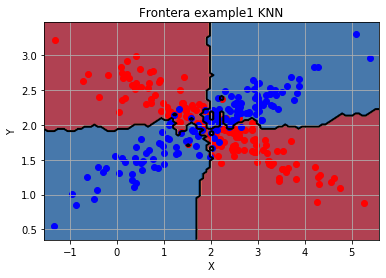

In [8]:
grafica('./datos/example1.data', 'Frontera example1 KNN', clf)

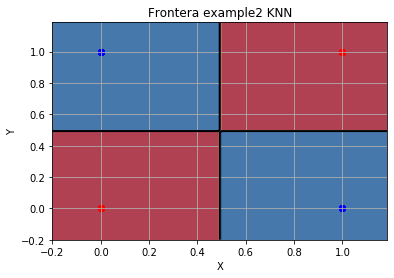

In [9]:
grafica('./datos/example2.data', 'Frontera example2 KNN', clf)

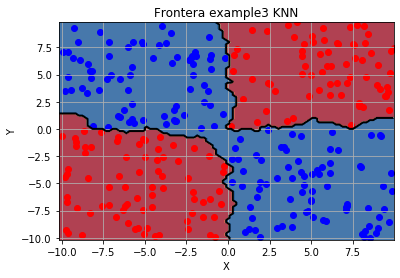

In [10]:
grafica('./datos/example3.data', 'Frontera example3 KNN', clf)

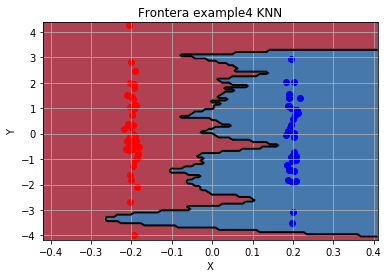

In [11]:
grafica('./datos/example4.data', 'Frontera example4 KNN', clf)

FONS Usa esta celda para comentar tus conclusiones

## Apartado 4: ROC
___

Para cada clasificador, vamos  a dibujar un punto en el espacio ROC. Los puntos son de la forma (FPR, TPR), o lo que es lo mismo, 
(FP/(FP+TN), TP/(TP+FN))

En la siguiente celda, implementamos una función que nos devuelve el punto a representar el espacio ROC para una estrategia y clasificador dados después de repetir el proceso de validacion para cierto número de repeticiones.

Llamamos a esta función una vez por cada clasificador y fichero, y dibujamos en $[0,1]\times[0,1]$ los puntos obtenidos.

In [1]:
import Datos as d
import EstrategiaParticionado as ep
import Clasificador as cl
import numpy as np

def ROC(dataset, estrategia, clasificador):
    TPR = 0
    FPR = 0
    nRepes = 5
    for i in range(nRepes):
        errores, matriz = clasificador.validacion(estrategia,dataset,clasificador, ROC = True)    
        TP = matriz[0][0]
        FP = matriz[0][1]
        FN = matriz[1][0]
        TN = matriz[1][1]
        TPR += (TP/(TP+FN))/(nRepes)
        FPR += (FP/(FP+TN))/(nRepes)
    return [FPR], [TPR]
        

In [27]:
estrategia = ep.ValidacionSimple(25)
clasificador = cl.ClasificadorNaiveBayes(laplace = True)
dataset = d.Datos('./datos/online_shoppers.data')
nb_o = ROC(dataset, estrategia,clasificador)
print(nb_o)

estrategia = ep.ValidacionSimple(25)
clasificador = cl.ClasificadorRegresionLogistica(cteApr = 0.5)
dataset = d.Datos('./datos/online_shoppers.data', oneHot = True)
rl_o = ROC(dataset, estrategia,clasificador)
print(rl_o)

estrategia = ep.ValidacionSimple(25)
clasificador = cl.ClasificadorRegresionLogistica(cteApr = 0.5)
dataset = d.Datos('./datos/wdbc.data', oneHot = True)
rl_w = ROC(dataset, estrategia,clasificador)
print(rl_w)


([0.15783038361824142], [0.6557638776799899])
([0.3796355647395424], [0.7621441307182397])
([0.3437429815603702], [0.9875754694223795])


In [28]:
estrategia = ep.ValidacionSimple(25)
clasificador = cl.ClasificadorNaiveBayes(laplace = True)
dataset = d.Datos('./datos/wdbc.data')
nb_w = ROC(dataset, estrategia,clasificador)
print(nb_w)


([0.03159144361308258], [0.8769749447547281])


# FONS

* Para esto, corre primero la celda donde se define la funcion que esta más arriba, la de ROC
* Luego las que tengo debajo, donde llamo a tu clasificador (voy a poner K = 3 xq me han dicho q uno de los dos archivos es muy lento, si ves que se traga un K = 5 ponselo. Si la llamada no funciona a la primera, revisa si he escrito mal algo, pero lo que sea que haya en las lineas de debajo debería parecerse a lo mío de arriba.
* Es importante que el return de la función lo dejes con el mismo nombre, porque la celda donde grafique va a  usar las variables knn_w, knn_o
* Por ultimo, llama a la celda que está 3 por debajo de esta, que es donde se hace el dibujito
* Luego comenta debajo del dibujito. He intentado que mi comentario de Naive Bayes no fuera muy dependiente de los resultados que a ti te fueran a dar KNN, pero just in case revisa lo mío. Estaría bien que comentaras algo de los resultados de KNN comparando entre los dos ficheros, y luego que compararas KNN con NB y con regresion logistica (mas o menos como yo hago para comparar reglog con nb). Cuando yo escribi lo mio no tenia muy claro que poner, así que si tienes alguna otra observacion guay, adelante


In [2]:
K = 5
estrategia = ep.ValidacionSimple(25)
clasificador = cl.ClasificadorVecinosProximos(K, True)
dataset = d.Datos('./datos/wdbc.data')
knn_w = ROC(dataset, estrategia,clasificador)
print(knn_w)

([0.032460454385342195], [0.875673874512947])


In [3]:
estrategia = ep.ValidacionSimple(25)
clasificador = cl.ClasificadorVecinosProximos(K, True)
dataset = d.Datos('./datos/online_shoppers.data')
knn_w = ROC(dataset, estrategia,clasificador)
print(knn_o)

KeyboardInterrupt: 

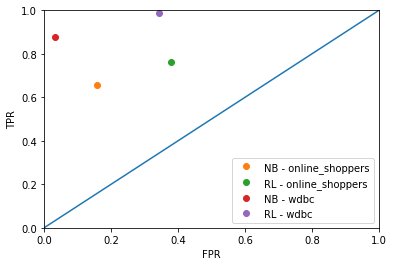

In [3]:
import matplotlib.pyplot as plt
# Copia-pegamos los valores para evitar tener que reejecutar las celdas
# anteriores por haber reiniciado el kernel
nb_o = ([0.15783038361824142], [0.6557638776799899])
rl_o = ([0.3796355647395424], [0.7621441307182397])
rl_w =([0.3437429815603702], [0.9875754694223795])
nb_w = ([0.03159144361308258], [0.8769749447547281])

plt.xlabel('FPR') 
plt.ylabel('TPR')
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,1])
plt.plot([0,1],[0,1])
plt.plot(nb_o[0], nb_o[1], 'o', label = 'NB - online_shoppers')
plt.plot(rl_o[0], rl_o[1], 'o', label = 'RL - online_shoppers')
plt.plot(nb_w[0], nb_w[1], 'o', label = 'NB - wdbc')
plt.plot(rl_w[0], rl_w[1], 'o', label = 'RL - wdbc')
plt.plot(knn_o[0], knn_o[1], 'o', label = 'KNN - online_shoppers')
plt.plot(knn_w[0], knn_w[1], 'o', label = 'KNN - wdbc')
plt.legend()

Todos los puntos quedan bastante por encima de la diagonal: esto quiere decir que muy pocos negativos son clasificados como positivos son negativos, y que un alto porcentaje de los clasificados como positivos son realmente positivos. Por tanto, podemos decir que nuestros modelos son buenos clasificadores.

Tanto Naive-Bayes como regresión logística clasifican mejor el fichero de `wdbc` que el de `online_shoppers`. Para el caso de regresión logística, esto era algo que ya habíamos observado en los análisis de apartados anteriores.

Para esos dos ficheros, parece que aunque la tasa de falsos positivos sea menor (que es lo que buscamos) con Naive-Bayes, la mayor tasa de verdaderos positivos se consigue con regresión logística.